## Multiclass Classification 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt 

## Loading Data

In [4]:
data = pd.read_csv('predictive_maintenance.csv')

In [5]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [7]:
data.shape

(10000, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [9]:
data.count()  

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Target                     10000
Failure Type               10000
dtype: int64

In [10]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

## Data Pre-Processing

In [11]:
data.nunique().sort_values()

Target                         2
Type                           3
Failure Type                   6
Process temperature [K]       82
Air temperature [K]           93
Tool wear [min]              246
Torque [Nm]                  577
Rotational speed [rpm]       941
UDI                        10000
Product ID                 10000
dtype: int64

In [12]:
print(data.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [13]:
data.duplicated().sum()

0

In [14]:
data.groupby(['Target','Failure Type']).count().drop(['UDI', 'Product ID', 'Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

## Data Visualization

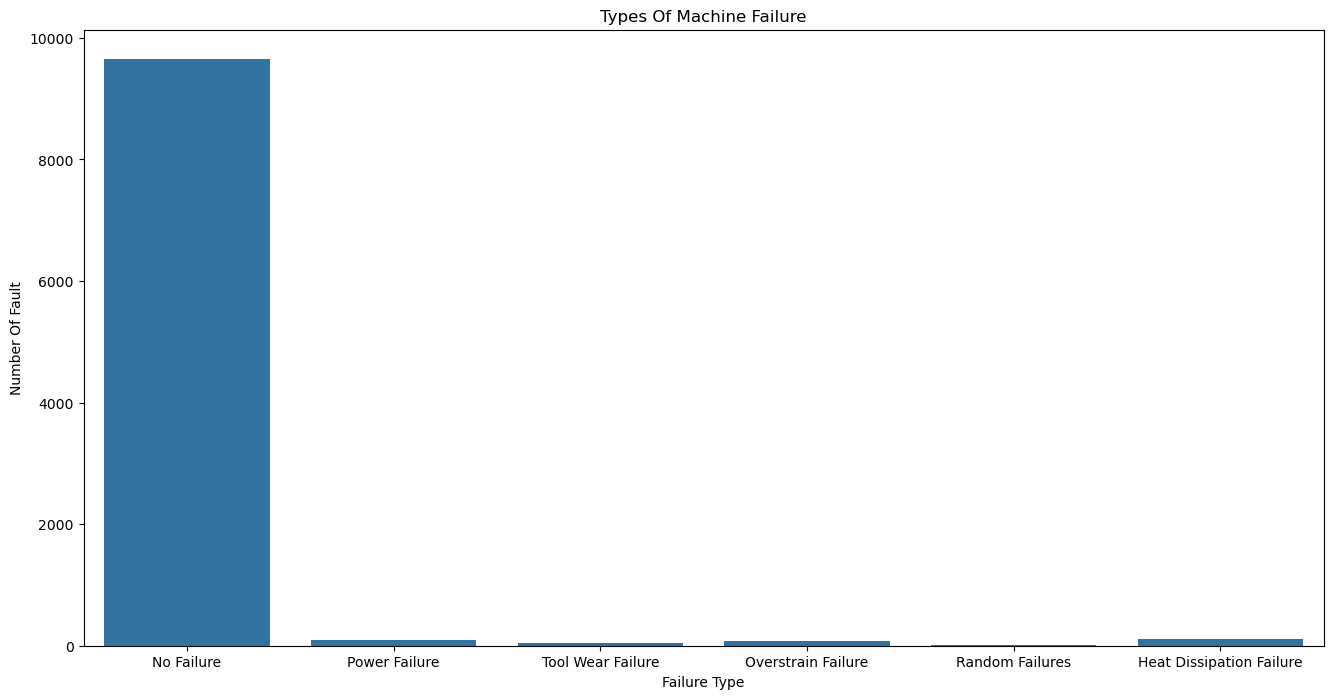

In [15]:
plt.figure(figsize=(16,8))

sns.countplot(x=data["Failure Type"])
plt.title('Types Of Machine Failure')
plt.xlabel('Failure Type')
plt.ylabel('Number Of Fault')
plt.show()

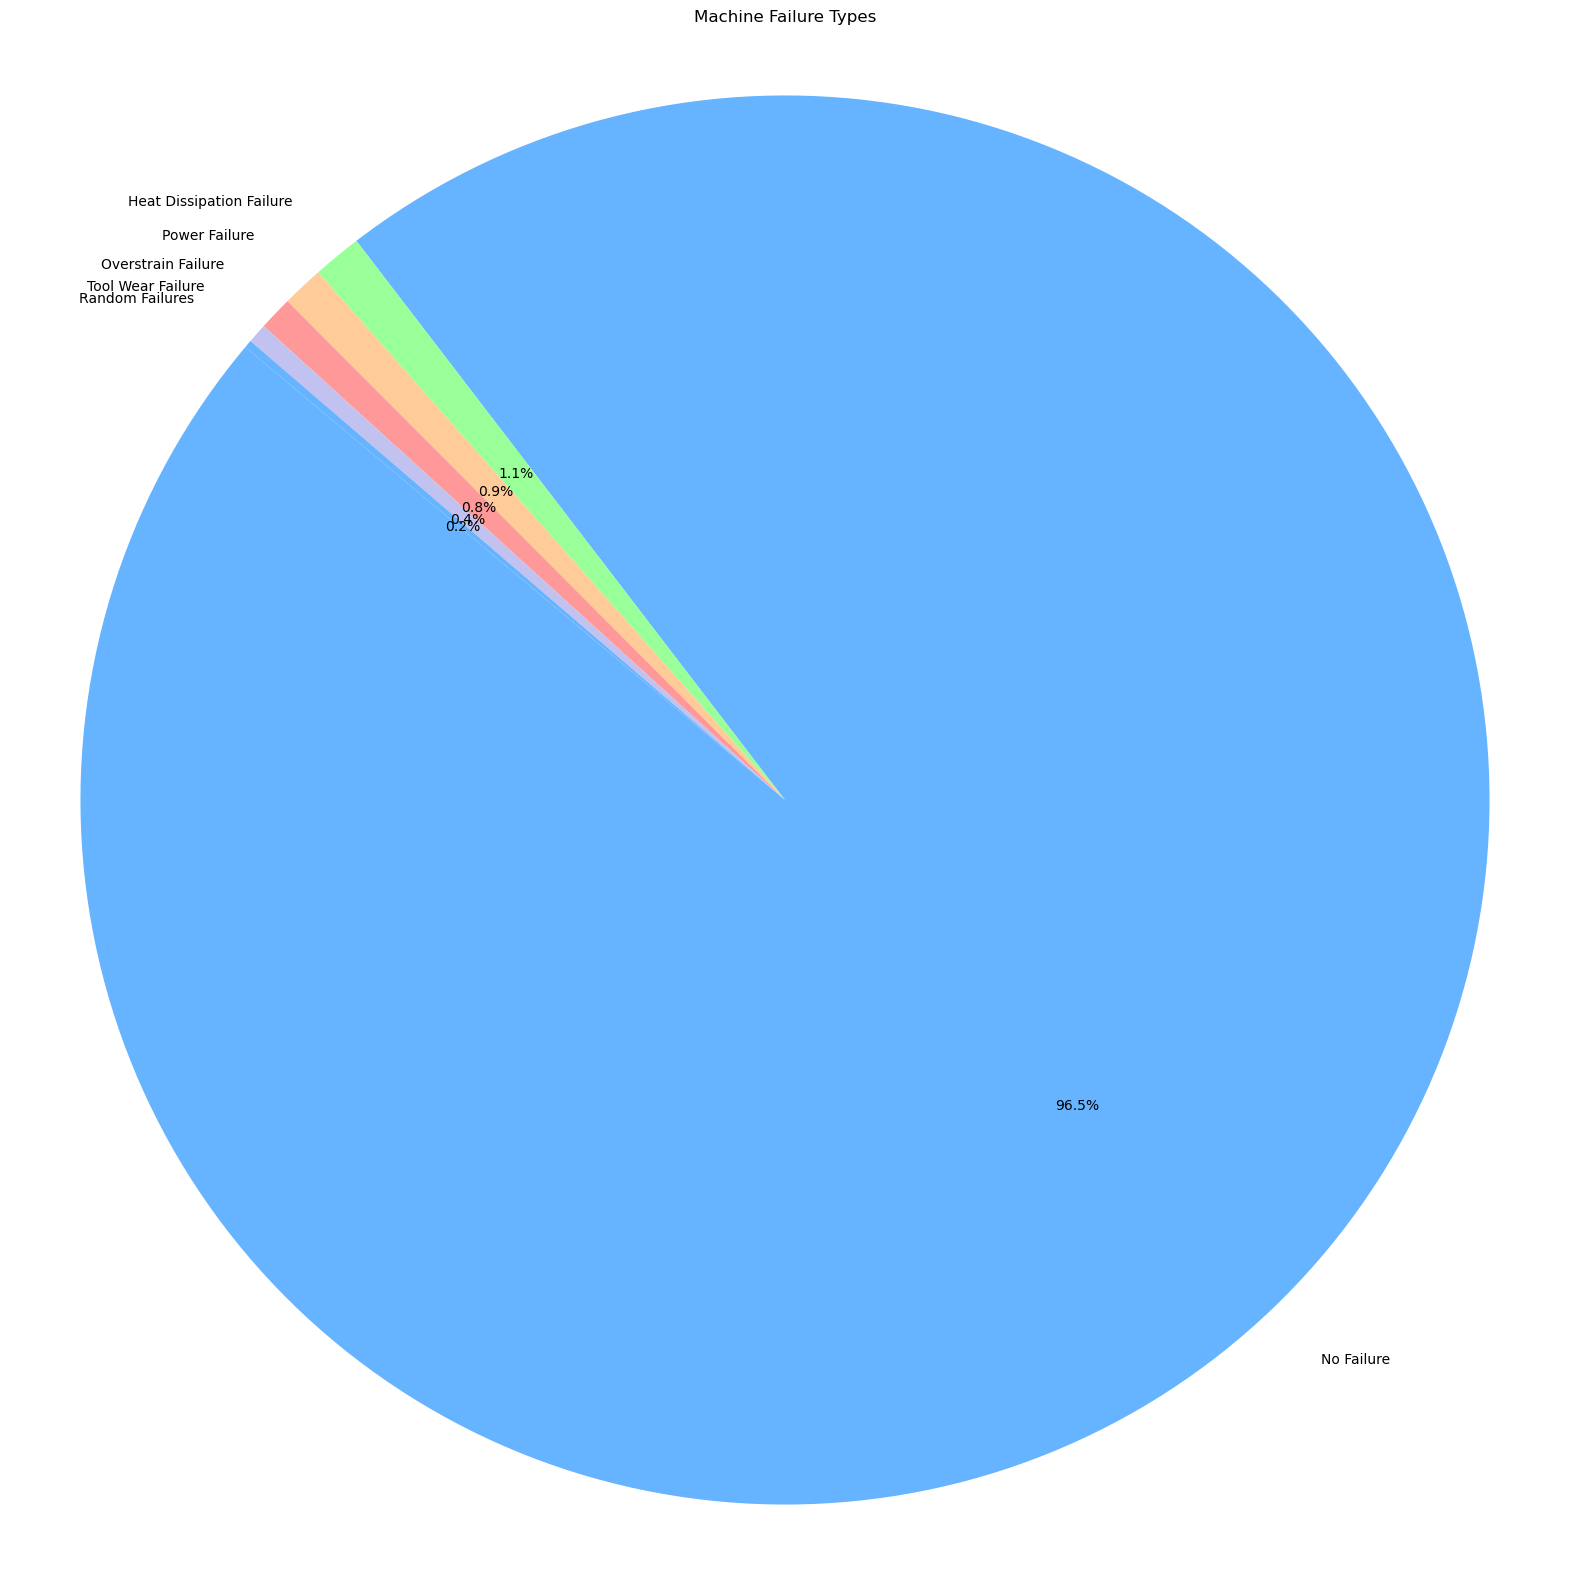

In [16]:
# Count each failure type
failure_counts = data['Failure Type'].value_counts()

plt.figure(figsize=(20, 20))
plt.pie(failure_counts, 
        labels=failure_counts.index, 
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66b3ff','#99ff99','#ffcc99','#ff9999','#c2c2f0'])
plt.title('Machine Failure Types')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

## Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

# Separate feature
X = data.drop(columns=['Target', 'Failure Type'])
y_multi = data['Failure Type']

In [18]:
# Encode Multi
label_encoder = LabelEncoder()
y_multi_encoded = label_encoder.fit_transform(y_multi)

## Split

In [19]:
from sklearn.model_selection import train_test_split

#Multi
X_train_multi, X_test_multi, y_train_multi, y_test_multi= train_test_split(X, y_multi_encoded, test_size=0.3, random_state=42)

## Scaling

In [20]:
# Check for non-numeric columns for Multi
non_numeric_columns = X_train_multi.select_dtypes(exclude=['number']).columns
non_numeric_columns = X_test_multi.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric (if they are categorical)
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to non-numeric columns
for col in non_numeric_columns:
    le = LabelEncoder()
    X_train_multi[col] = le.fit_transform(X_train_multi[col])
    X_test_multi[col] = le.fit_transform(X_test_multi[col])

In [21]:
from sklearn.preprocessing import StandardScaler

# Scaler for Multi
scaler = StandardScaler()
X_train_multi_scaled = scaler.fit_transform(X_train_multi)
X_test_multi_scaled = scaler.transform(X_test_multi)

## Balance using Smote

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Apply SMOTE (Class imblanace)
smote = SMOTE(random_state=42)
X_train_multi_smote, y_train_multi_smote = smote.fit_resample(X_train_multi_scaled, y_train_multi)

In [23]:
y_train_multi_smote_series = pd.Series(y_train_multi_smote)

print(y_train_multi_smote_series.value_counts())

1    6749
5    6749
0    6749
3    6749
2    6749
4    6749
Name: count, dtype: int64


## Predicting Models: Machine Learning Algorithms

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## 1. XGBoost

In [25]:
import xgboost as xgb

# Initialize the model
xgboost =  xgb.XGBClassifier()


 --XGBoost for Muliti-Class Classification--

 Accuracy: 	 0.9833333333333333

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.99      1.00      0.99      2903
           2       0.78      0.64      0.70        22
           3       0.91      0.65      0.75        31
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.98      3000
   macro avg       0.58      0.53      0.55      3000
weighted avg       0.98      0.98      0.98      3000



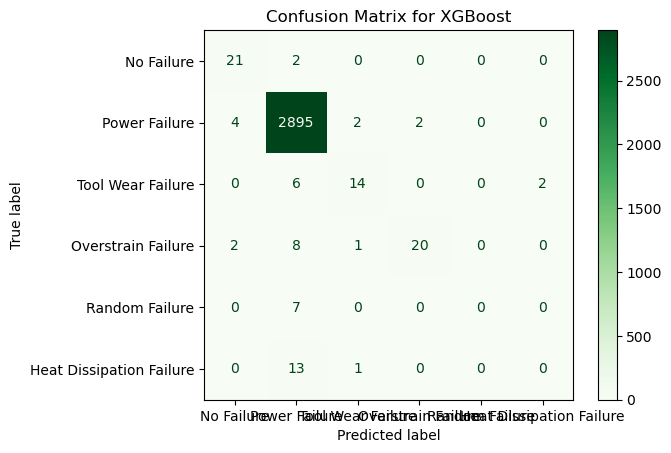

In [26]:
# Train the model for Multi-Class Classification
xgboost.fit(X_train_multi_scaled, y_train_multi) 
# Predict  
y_pred_xgboost_multi = xgboost.predict(X_test_multi_scaled) 

print("\n --XGBoost for Muliti-Class Classification--")

# Model Evaluation y_pred_gradboost_multi
print("\n Accuracy: \t", accuracy_score(y_test_multi, y_pred_xgboost_multi))
print("\n Classification Report: \n", classification_report(y_test_multi, y_pred_xgboost_multi))

# Class labels for multiclass confusion matrices
class_labels = ['No Failure', 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure', 'Random Failure', 'Heat Dissipation Failure']

#Confusion Matrix
Confusion_Matrix_XG = confusion_matrix(y_test_multi, y_pred_xgboost_multi)
display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix_XG, display_labels = class_labels)
display.plot(cmap = "Greens", values_format = "d")
plt.title("Confusion Matrix for XGBoost")
plt.show()

## 2. LightGBM

In [27]:
import lightgbm as lgb

# Initialize the model
lightgbm = lgb.LGBMClassifier()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1437
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 8
[LightGBM] [Info] Start training from score -4.365029
[LightGBM] [Info] Start training from score -0.036516
[LightGBM] [Info] Start training from score -4.828314
[LightGBM] [Info] Start training from score -4.694782
[LightGBM] [Info] Start training from score -6.455770
[LightGBM] [Info] Start training from score -5.419678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

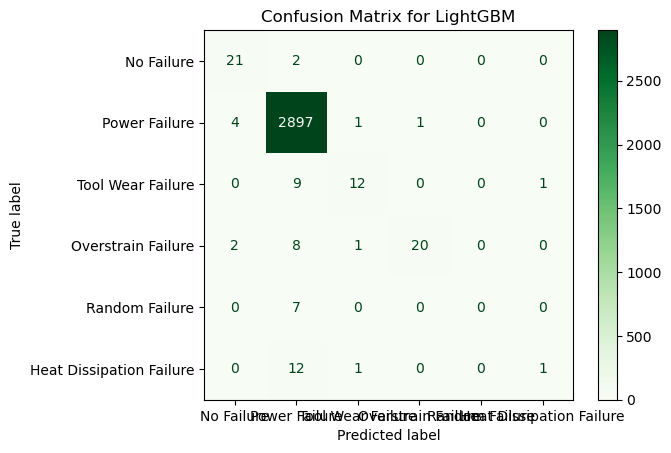

In [28]:
# Train the model for Multi-Class Classification
lightgbm.fit(X_train_multi_scaled, y_train_multi) 
# Predict  
y_lightgbm_multi = lightgbm.predict(X_test_multi_scaled) 

print("\n --LightGBM for Muliti-Class Classification--")

# Model Evaluation y_pred_gradboost_multi
print("\n Accuracy: \t", accuracy_score(y_test_multi, y_lightgbm_multi))
print("\n Classification Report: \n", classification_report(y_test_multi, y_lightgbm_multi))

# Class labels for multiclass confusion matrices
class_labels = ['No Failure', 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure', 'Random Failure', 'Heat Dissipation Failure']

#Confusion Matrix
Confusion_Matrix_LightGBM = confusion_matrix(y_test_multi, y_lightgbm_multi)
display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix_LightGBM, display_labels = class_labels)
display.plot(cmap = "Greens", values_format = "d")
plt.title("Confusion Matrix for LightGBM")
plt.show()

## 3. Stack Model

In [31]:
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Define base estimators
estimators = [
    ('xgboost', xgb.XGBClassifier()),
    ('lightgbm', lgb.LGBMClassifier())
]

# Define stacking classifier
stacked_models = StackingClassifier(
    estimators = estimators,
    final_estimator = CatBoostClassifier()
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1437
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 8
[LightGBM] [Info] Start training from score -4.365029
[LightGBM] [Info] Start training from score -0.036516
[LightGBM] [Info] Start training from score -4.828314
[LightGBM] [Info] Start training from score -4.694782
[LightGBM] [Info] Start training from score -6.455770
[LightGBM] [Info] Start training from score -5.419678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

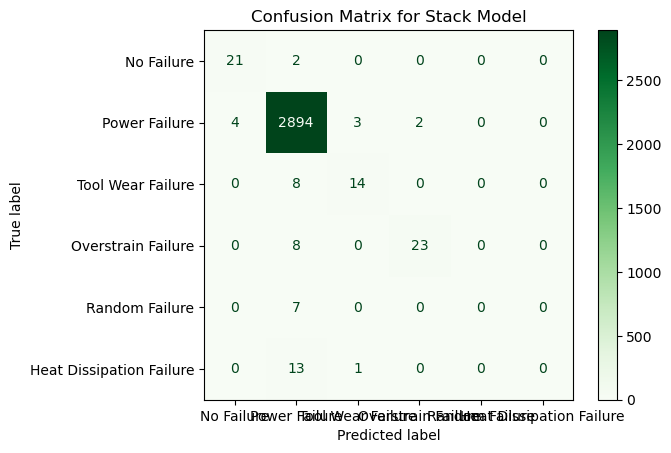

In [32]:
# Training the stacked_modelsl for Multi-Class Classification
stacked_models.fit(X_train_multi_scaled, y_train_multi) 
# Predict  
y_pred_stacked_models_multi = stacked_models.predict(X_test_multi_scaled)

print("\n --Stacked ML algorithms for Muliti-Class Classification--")

# Model Evaluation y_pred_gradboost_multi
print("\n Accuracy: \t", accuracy_score(y_test_multi, y_pred_stacked_models_multi))
print("\n Classification Report: \n", classification_report(y_test_multi, y_pred_stacked_models_multi))

# Class labels for multiclass confusion matrices
class_labels = ['No Failure', 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure', 'Random Failure', 'Heat Dissipation Failure']

#Confusion Matrix
Confusion_Matrix_Stack = confusion_matrix(y_test_multi, y_pred_stacked_models_multi)
display = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix_Stack, display_labels = class_labels)
display.plot(cmap = "Greens", values_format = "d")
plt.title("Confusion Matrix for Stack Model")
plt.show()